In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.utils import resample 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score
import pickle 

### data collection and processing 

In [2]:
# load the dataset to a pandas dataframe
data=pd.read_csv("Rainfall.csv")

In [3]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [5]:
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [6]:
#remove extra space in all columns
data.columns=data.columns.str.strip()

In [7]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [8]:
#dropping the day columns ,day is not required for this
data=data.drop(columns=["day"])

In [9]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [10]:
#cheak NAN values in dataset

data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [11]:
#handling the missing val
data["winddirection"]=data["winddirection"].fillna(data["winddirection"].mode()[0])
data["windspeed"]=data["windspeed"].fillna(data["windspeed"].median())

In [12]:
#converting rainfall class yes &  no to 1 & 0
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["rainfall"]=le.fit_transform(data["rainfall"])

### Exploratory data analyis (EDA)

In [13]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [14]:
#setting plot style for all the plots
sns.set(style="whitegrid")

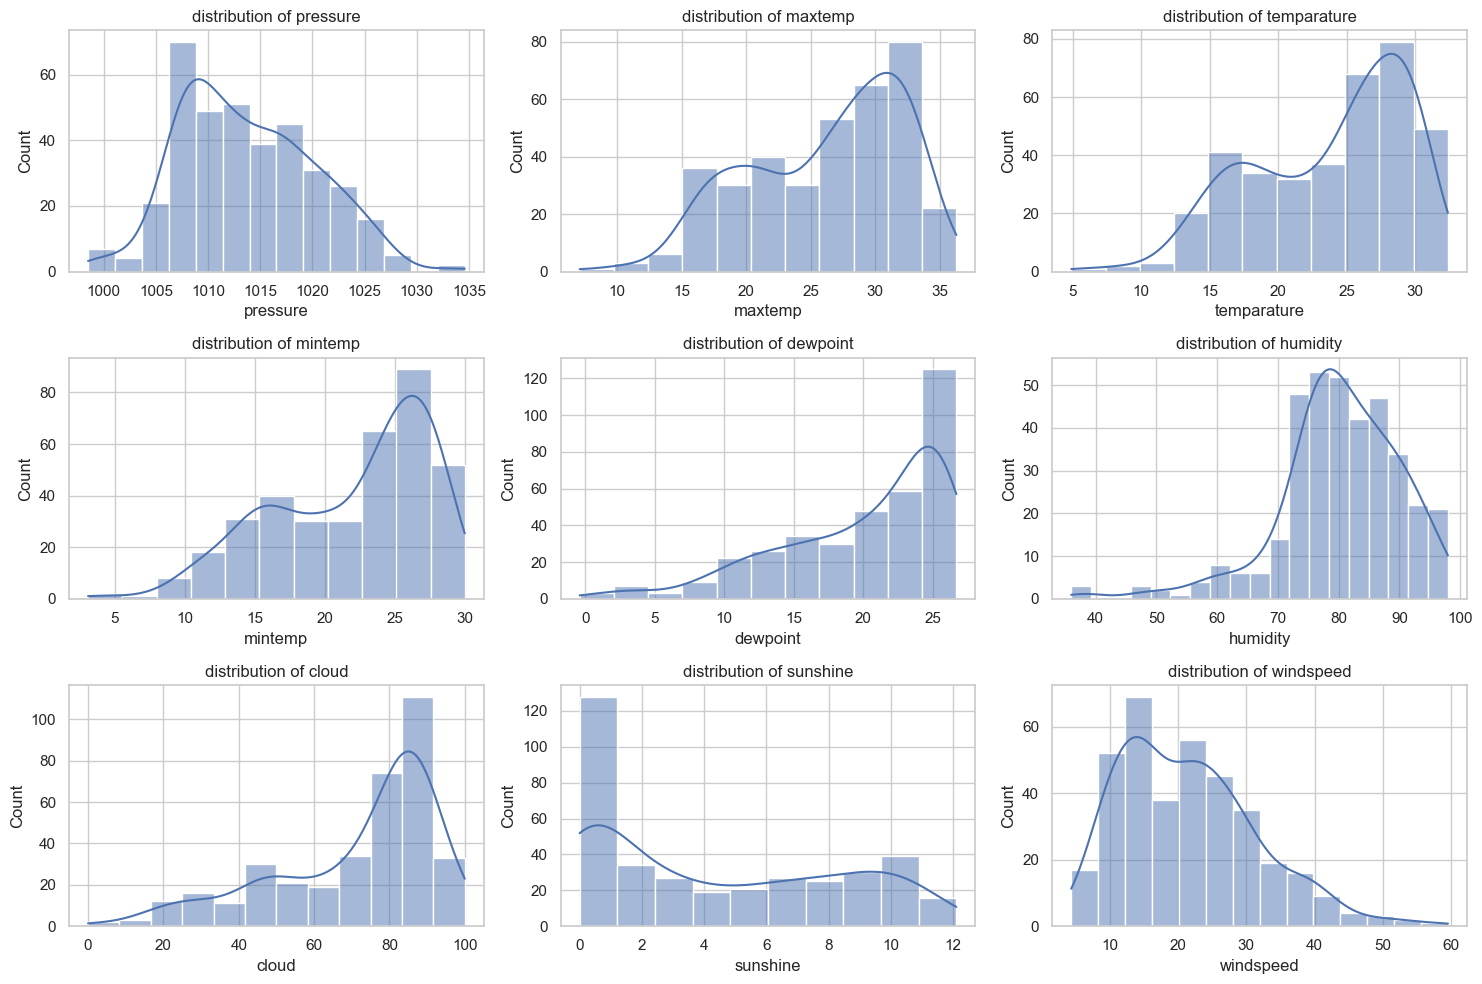

In [15]:
 plt.figure(figsize=(15,10))

for i,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine',  'windspeed'],1):
    plt.subplot(3,3,i)
    sns.histplot(data[column],kde=True)
    plt.title(f"distribution of {column}")

plt.tight_layout()
plt.show()


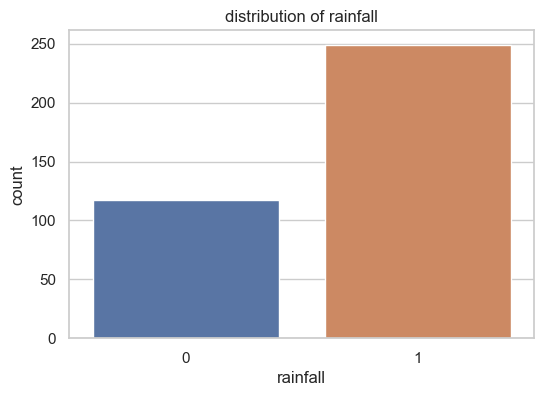

In [16]:
plt.figure(figsize=(6,4)) 
sns.countplot(x="rainfall",data=data)
plt.title("distribution of rainfall")
plt.show()

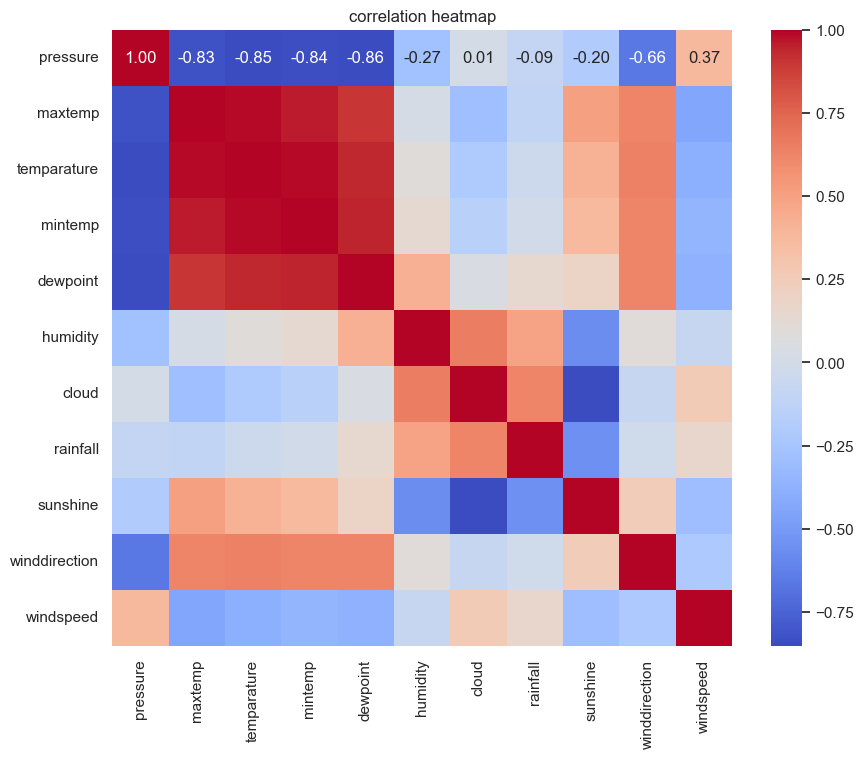

In [17]:
#correlation matrix 

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm",fmt='.2f',robust=True)
plt.title("correlation heatmap")
plt.show()


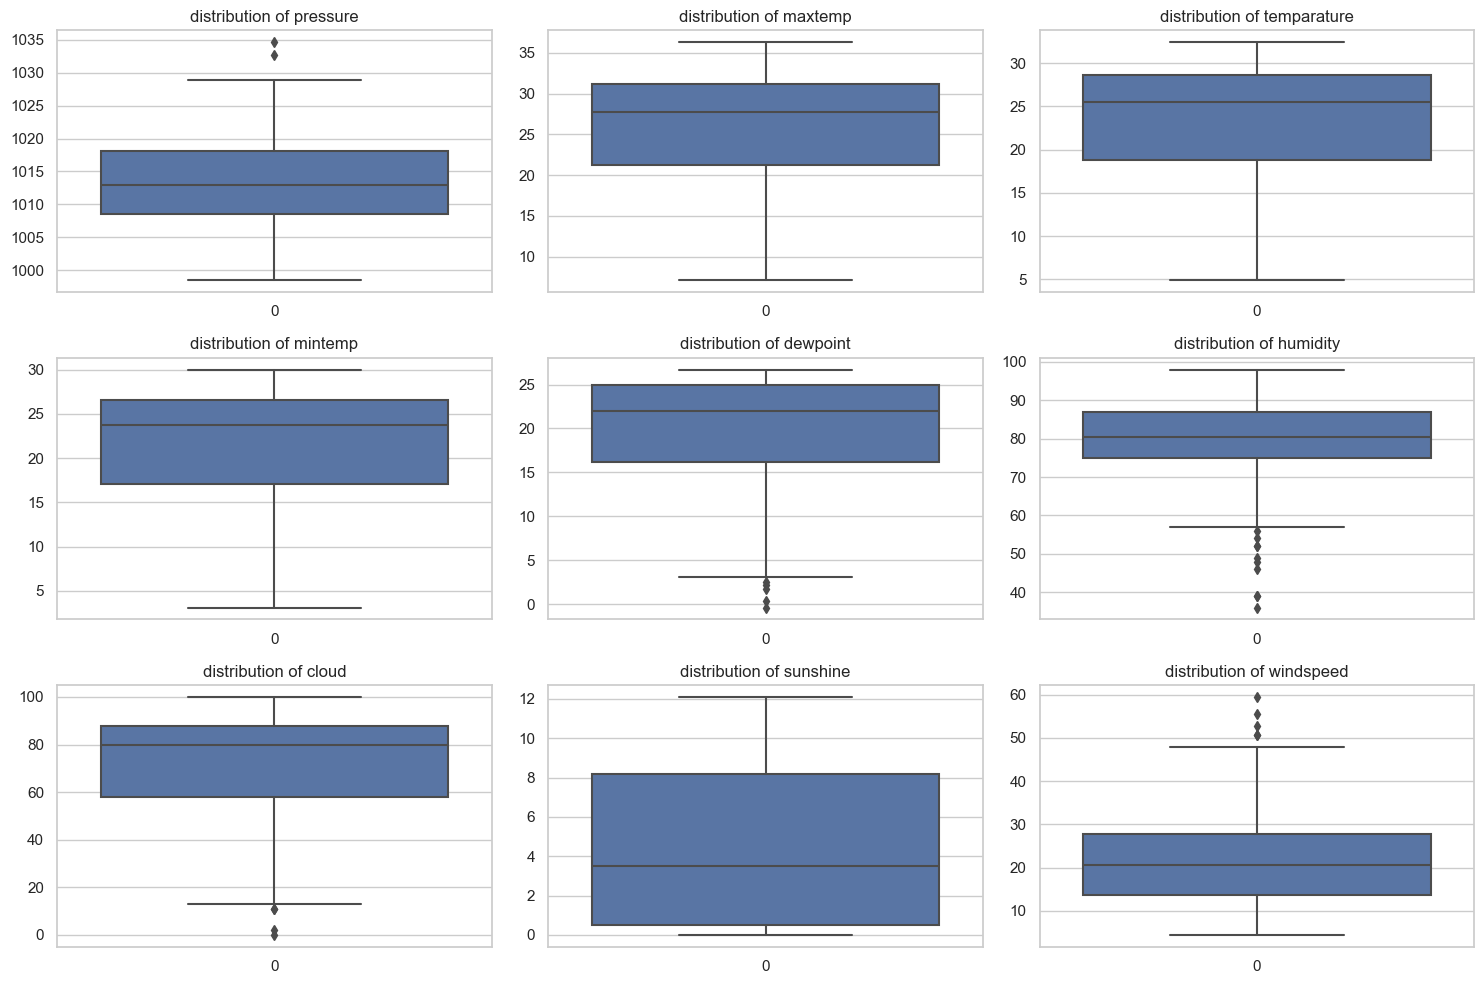

In [18]:
 plt.figure(figsize=(15,10))

for i,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine',  'windspeed'],1):
    plt.subplot(3,3,i)
    sns.boxplot(data[column])
    plt.title(f"distribution of {column}")

plt.tight_layout()
plt.show()

### data preprocesing 

In [19]:
#drop highly correlated column
data=data.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [20]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [21]:
print(data["rainfall"].value_counts())

rainfall
1    249
0    117
Name: count, dtype: int64


In [22]:
#seperate majorty and minarity class
df_majorty=data[data["rainfall"]==1]
df_minorty=data[data["rainfall"]==0]

In [23]:
print(df_majorty,df_minorty.shape)

     pressure  dewpoint  humidity  cloud  rainfall  sunshine  winddirection  \
0      1025.9      13.1        72     49         1       9.3           80.0   
1      1022.0      15.6        81     83         1       0.6           50.0   
2      1019.7      18.4        95     91         1       0.0           40.0   
3      1018.9      18.8        90     88         1       1.0           50.0   
4      1015.9      19.9        95     81         1       0.0           40.0   
..        ...       ...       ...    ...       ...       ...            ...   
359    1020.4      13.5        75     89         1       0.7           10.0   
361    1022.7      15.0        84     90         1       0.0           30.0   
362    1026.6      12.8        75     85         1       1.0           20.0   
363    1025.9      13.3        75     78         1       4.6           70.0   
364    1025.3      13.3        78     86         1       1.2           20.0   

     windspeed  
0         26.3  
1         15.3  


In [24]:
#downsample majorty class to minorty count
df_majorty_downsampled=resample(df_majorty,replace=False,n_samples=len(df_minorty),random_state=42)

In [25]:
df_majorty_downsampled.shape

(117, 8)

In [26]:
df_downsampled=pd.concat([df_majorty_downsampled,df_minorty])

In [27]:
df_downsampled.shape

(234, 8)

In [28]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [29]:
#shuffle the final dataframe
df_downsampled=df_downsampled.sample(frac=1,random_state=42).reset_index(drop=True)

In [30]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [31]:
df_downsampled["rainfall"].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [32]:
#spliting x and y
x=df_downsampled.drop(columns="rainfall")
y=df_downsampled["rainfall"]


In [33]:
#spliting the data into training data and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Model hyper parameter tuning

In [34]:
rf_model= RandomForestClassifier(random_state=42)

In [50]:
parameters =[{
    'n_estimators': [50,100,200],
    'max_depth': [None, 10, 20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features':["sqrt","log2"],
}]


In [51]:
grid_rf = GridSearchCV(estimator=rf_model,param_grid=parameters,scoring="accuracy", cv=5,n_jobs=-1, verbose=2)

In [52]:
grid_rf.fit(x_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [None, 10, 20, 30],
                          'max_features': ['sqrt', 'log2'],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [50, 100, 200]}],
             scoring='accuracy', verbose=2)

In [53]:
best_rf_model=grid_rf.best_estimator_
print(grid_rf.best_estimator_)

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=42)


### Model Evaluation 

In [54]:
cv_scores=cross_val_score(best_rf_model,x_train,y_train,cv=5)
print("cross-validation score :",cv_scores)
print("mean cross-validation score :",np.mean(cv_scores))

cross-validation score : [0.68421053 0.81578947 0.83783784 0.83783784 0.91891892]
mean cross-validation score : 0.818918918918919


In [61]:
#test set performance 
y_pred=best_rf_model.predict(x_test)

print("Accuracy:\n" ,accuracy_score(y_test,y_pred))
print("confusion matrix :\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))

Accuracy:
 0.7446808510638298
confusion matrix :
 [[17  7]
 [ 5 18]]
classification report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



In [62]:
x_train.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

 ### prediction on unknown data 

In [65]:
input_data=(1022.2,14.1,78,90,0.0,30.0,28.5)
input_df=pd.DataFrame([input_data],columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'])



In [66]:
input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,0.0,30.0,28.5


In [67]:
prediction=best_rf_model.predict(input_df)

print("prediction result :","Rainfall" if prediction[0]==1 else "No Rainfall")

prediction result : Rainfall


In [68]:
# save model and feature names to a pickle file 
model_data={"model":best_rf_model,"feature_names":x.columns.tolist()}

with open("rainfall_model.pkl","wb") as file:
    pickle.dump(model_data,file)

### load the saved model and file use it for prediction

In [69]:
# load the trained model and feature names from the pickle file 
with open("rainfall_model.pkl","rb") as file:
    model_data=pickle.load(file)

In [70]:
model =model_data["model"]
feature_names=model_data["feature_names"]

In [71]:
input_data=(1022.2,14.1,78,90,0.0,30.0,28.5)
input_df=pd.DataFrame([input_data],columns=feature_names)


In [72]:
prediction=best_rf_model.predict(input_df)

print("prediction result :","Rainfall" if prediction[0]==1 else "No Rainfall")

prediction result : Rainfall
